/var/folders/l3/g6s579ys4tj4mcr5rh4x02nc0000gn/T/ipykernel_58553/3029364213.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=50, cmap='Spectral')


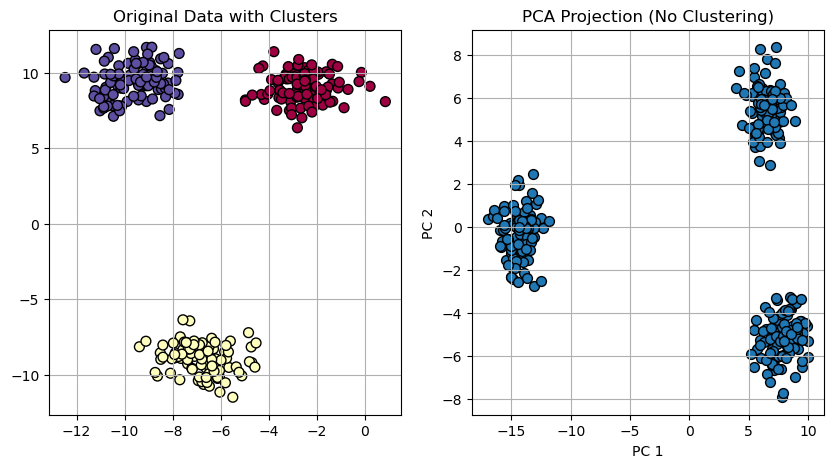

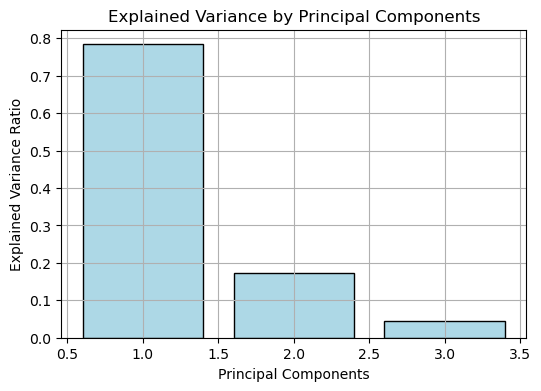

PCA Components (Eigenvectors):
[[ 0.59182901  0.6351769   0.49627484]
 [-0.56891093 -0.10700701  0.81540779]
 [-0.57103308  0.76491817 -0.29802923]]


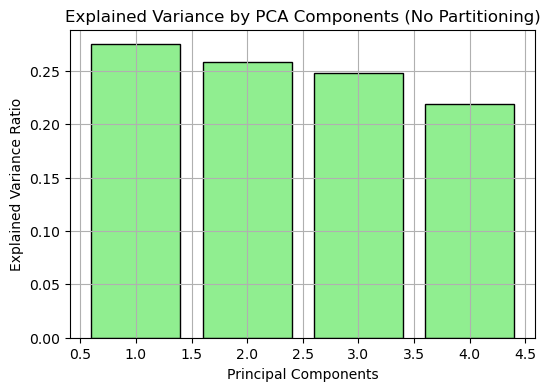

PCA Components for Variable Partitioning Issue:
[[-0.53363141  0.74139335  0.18425547  0.36279931]
 [ 0.6141199   0.0093104   0.38756554  0.68743219]
 [-0.09458888 -0.08542231  0.89818871 -0.42072916]
 [ 0.57371353  0.66554657 -0.0953935  -0.46776128]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

def plot_pca(X, title):
    """plot PCA results"""
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=50, cmap='Spectral')
    plt.title(title)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.grid(True)
    plt.show()

# 1. No Clustering (PCA)
# Generate a dataset with distinct clusters
X_clusters, y_clusters = make_blobs(n_samples=300, centers=3, n_features=5, random_state=42)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_clusters[:, 0], X_clusters[:, 1], c=y_clusters, edgecolor='k', s=50, cmap='Spectral')
plt.title("Original Data with Clusters")
plt.grid(True)

# Apply PCA and show that it doesn't inherently capture clustering
plt.subplot(1, 2, 2)
plot_pca(X_clusters, "PCA Projection (No Clustering)")

# 2. Complex Component Interpretation (PCA)
# Generate random dataset with correlated features
np.random.seed(0)
X_complex = np.random.multivariate_normal([0, 0, 0], [[1, 0.8, 0.5], [0.8, 1, 0.7], [0.5, 0.7, 1]], size=300)

# Fit PCA
pca = PCA(n_components=3)
pca.fit(X_complex)

# Plot explained variance
plt.figure(figsize=(6, 4))
plt.bar(range(1, 4), pca.explained_variance_ratio_, color='lightblue', edgecolor='k')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# Display the PCA components (eigenvectors)
print("PCA Components (Eigenvectors):")
print(pca.components_)

# This shows the complexity in interpreting the components because they are combinations of all variables.

# 3. No Variable Partitioning (PCA)
# Generate synthetic data with multiple variables
np.random.seed(42)
X_partitioning = np.random.randn(300, 4)  # 4 independent features

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_partitioning)

# Apply PCA
pca_partitioning = PCA(n_components=4)
pca_partitioning.fit(X_scaled)

# Visualize how the variance is distributed across components
plt.figure(figsize=(6, 4))
plt.bar(range(1, 5), pca_partitioning.explained_variance_ratio_, color='lightgreen', edgecolor='k')
plt.title("Explained Variance by PCA Components (No Partitioning)")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# Show that there is no meaningful partitioning of variables by PCA
print("PCA Components for Variable Partitioning Issue:")
print(pca_partitioning.components_)
